# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


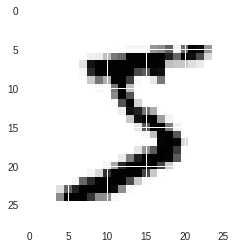

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
classifier = Sequential()

keras.initializers.glorot_uniform(seed=11)


classifier.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Convolution2D(16,3,3, activation='relu'))
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Convolution2D(16,3,3, activation='relu'))

#classifier.add(Convolution2D(10, 26))
classifier.add(Flatten())
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(10,activation='relu'))

classifier.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                9280      
__________

In [0]:
# from keras import optimizers

# epochs=15
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8
# sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [0]:
classifier.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

patience = 2
stopper = callback.EarlyStopping(monitor='val_acc', patience=patience,verbose=1)
#stopper = [EarlyStopping(monitor='val_acc', patience=patience]
            

In [0]:
# class EarlyStoppingByAccuracy(callback):
#     def __init__(self, monitor='accuracy', value=0.98, verbose=0):
#         super(callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current >= self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True
            
# callback = [
#     EarlyStoppingByAccuracy(monitor='accuracy', value=0.98, verbose=1),
#     ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
# ]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
   featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

#ydatagen= ImageDataGenerator()

# fits the model on batches with real-time data augmentation:
classifier.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10,
                    validation_data=(X_test, Y_test),callbacks=[stopper])             


Epoch 1/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0293 - acc: 0.9910 - val_loss: 0.0311 - val_acc: 0.9911
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0283 - val_acc: 0.9914
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0322 - val_acc: 0.9907
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.0289 - val_acc: 0.9925
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0282 - acc: 0.9912 - val_loss: 0.0288 - val_acc: 0.9913
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0280 - val_acc: 0.9921
Epoch 00006: early stopping


In [0]:
score = classifier.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.028040868042056535, 0.9921]


In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.6704278e-09 7.6704278e-09 1.2630500e-06 1.2537545e-07 2.4702093e-08
  7.6704278e-09 7.6704278e-09 9.9999857e-01 7.6704278e-09 3.5007115e-08]
 [4.2288516e-12 8.3793739e-10 1.0000000e+00 6.6109375e-11 4.2288516e-12
  4.2288516e-12 4.2288516e-12 8.6792667e-10 4.2288516e-12 4.2288516e-12]
 [2.1269837e-07 9.9999726e-01 2.1269837e-07 2.1269837e-07 8.9115213e-07
  2.1269837e-07 2.1269837e-07 2.5816570e-07 2.1269837e-07 2.1269837e-07]
 [9.9997425e-01 2.7214303e-10 1.1246458e-09 2.7214303e-10 2.7214303e-10
  2.7214303e-10 2.5644358e-05 2.7214303e-10 5.9248453e-08 9.4764703e-09]
 [5.5070626e-10 5.5070626e-10 5.5070626e-10 5.5070626e-10 9.9999893e-01
  5.5070626e-10 7.4012229e-07 1.4172803e-09 1.9418481e-07 1.7667752e-07]
 [8.9702461e-08 9.9999702e-01 8.9702461e-08 8.9702461e-08 7.5290978e-07
  8.9702461e-08 8.9702461e-08 1.5059207e-06 8.9702461e-08 8.9702461e-08]
 [7.8202040e-09 2.0567069e-07 3.3347803e-08 7.8202040e-09 9.9995255e-01
  7.8202040e-09 7.8202040e-09 6.3883192e-08 2.9301114e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])

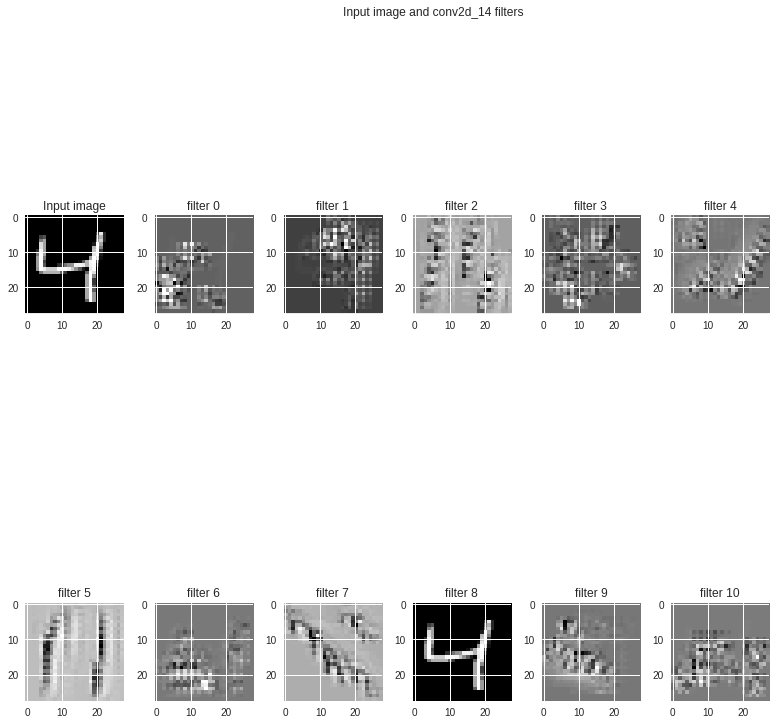

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, classifier.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([classifier.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()